In [1]:
#Importación de librearías necesarias
import pandas as pd
from datetime import datetime
import socket
import numpy as np
import math
import time
import pickle  #Para guardar archivos
import os

from pympler import asizeof #Para liberar memoria
import gc

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint

from sklearn.svm import SVC 
from xgboost import XGBClassifier

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical

from sklearn.neural_network import MLPClassifier
import sklearn.metrics
from sklearn.metrics import accuracy_score, precision_score,recall_score,classification_report,confusion_matrix,mean_absolute_error

from imblearn.combine import SMOTEENN

import joblib

semilla = 8

In [2]:
#Path general de archivos
if socket.gethostname()=='LAPTOP-PUSGG08B': #Ip de la laptop
    ruta = "E:/Cristian Guatemal/Master/Big Data y Ciencia de Datos/VIU_TFM/Data/TFM/"
    r_ruta = "E:/Cristian Guatemal/Master/Big Data y Ciencia de Datos/VIU_TFM/RData/TFM/"
    r_graf = 'E:/Cristian Guatemal/Master/Big Data y Ciencia de Datos/VIU_TFM/Reportes/'
elif socket.gethostname()=='PCUIOMTDAIE6382': #Ip del working pc
    ruta =   "D:/Master/Big_Data_Ciencia_Datos/VIU_TFM/Data/TFM/"
    r_ruta = "D:/Master/Big_Data_Ciencia_Datos/VIU_TFM/RData/TFM/"
    r_graf = 'D:/Master/Big_Data_Ciencia_Datos/VIU_TFM/Reportes/'
elif socket.gethostname()=='LPUIODAIE208Y3X': #Ip del working laptop
    ruta =   "C:/Cristian_Guatemal/Personal/Master/Big_Data_Ciencia_Datos/VIU_TFM/Data/TFM/"
    r_ruta = "C:/Cristian_Guatemal/Personal/Master/Big_Data_Ciencia_Datos/VIU_TFM/RData/TFM/"
    r_graf = 'C:/Cristian_Guatemal/Personal/Master/Big_Data_Ciencia_Datos/VIU_TFM/Reportes/'
# Ruta del archivo de pensionistas de vejez
ruta_vj = ruta + 'POB_VEJ_CD656_NEW.dsv'
# Ruta del archivo de historia laboral de pensionistas
ruta_afi = ruta + 'APORTES_CD656_new.dsv'

In [3]:
# Cargar archivo------------------------------------------------------------------------------------------------------------
directorio = r_ruta
nombre_archivo = 'viu_ml_preparacion_data.pkl'
ruta_archivo = os.path.join(directorio, nombre_archivo)
data= pd.read_pickle(ruta_archivo)

In [4]:
data

,SEXO,NUMERO_IMPOSICIONES,BASE_CAL,N_MESES,PRES,LS2,SAL_PROM2,LS_MS,TIEM_T,TIEM_MA,...,N_IND_P,N_VOL_EC_P,N_VOL_EX_P,M_PRI_P,M_PUB_P,M_IND_P,M_VOL_EC_P,M_VOL_EX_P,EDAD_J,TARGET
0,1,288.0,210.635000,297.0,2,382.4950,201.720411,370.00000,85,60,...,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,72,0
1,1,514.0,508.824667,523.0,2,1074.1950,499.528730,985.98375,79,60,...,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,64,0
2,0,544.0,566.339833,547.0,2,793.7350,357.121633,884.29750,83,60,...,0.0,0.000000,0.0,0.361702,0.638298,0.0,0.000000,0.0,68,0
3,1,278.0,1285.000000,278.0,2,1950.0000,851.960317,2950.00000,74,60,...,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,65,1
4,0,481.0,1325.717667,481.0,2,3056.1000,1065.141687,3341.93000,75,60,...,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442974,1,120.0,399.333333,121.0,2,421.0000,397.121212,409.00000,93,60,...,0.0,0.848485,0.0,0.166667,0.000000,0.0,0.833333,0.0,91,0
442975,0,109.0,424.344000,110.0,1,455.0375,382.017182,423.53125,68,60,...,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,67,1
442976,0,68.0,579.554912,69.0,1,904.4500,564.833623,909.81000,78,60,...,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,70,0
442977,1,180.0,215.797833,87.0,2,335.0000,196.642184,300.00000,78,60,...,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,66,0


In [5]:
#Selección de variables para entrenar los modelos
val_otr = ['BASE_CAL', 'LS2', 'SAL_PROM2', 'LS_MS', 'SUELDO',
           'SEXO', 'PRES', 'N_PRI_P', 'N_PUB_P', 'N_IND_P', 'N_VOL_EC_P',
           'N_VOL_EX_P', 'M_PRI_P', 'M_PUB_P', 'M_IND_P', 'M_VOL_EC_P','M_VOL_EX_P',
           'NUMERO_IMPOSICIONES', 'TIEM_T',
           'TARGET']
data_otr = data[ val_otr ]
data_otr

,BASE_CAL,LS2,SAL_PROM2,LS_MS,SUELDO,SEXO,PRES,N_PRI_P,N_PUB_P,N_IND_P,N_VOL_EC_P,N_VOL_EX_P,M_PRI_P,M_PUB_P,M_IND_P,M_VOL_EC_P,M_VOL_EX_P,NUMERO_IMPOSICIONES,TIEM_T,TARGET
0,210.635000,382.4950,201.720411,370.00000,14725.59,1,2,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,288.0,85,0
1,508.824667,1074.1950,499.528730,985.98375,31470.31,1,2,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,514.0,79,0
2,566.339833,793.7350,357.121633,884.29750,34997.92,0,2,0.357143,0.642857,0.0,0.000000,0.0,0.361702,0.638298,0.0,0.000000,0.0,544.0,83,0
3,1285.000000,1950.0000,851.960317,2950.00000,107347.00,1,2,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,278.0,74,1
4,1325.717667,3056.1000,1065.141687,3341.93000,88406.76,0,2,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0,481.0,75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442974,399.333333,421.0000,397.121212,409.00000,26210.00,1,2,0.151515,0.000000,0.0,0.848485,0.0,0.166667,0.000000,0.0,0.833333,0.0,120.0,93,0
442975,424.344000,455.0375,382.017182,423.53125,42021.89,0,1,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,109.0,68,1
442976,579.554912,904.4500,564.833623,909.81000,38973.52,0,1,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,68.0,78,0
442977,215.797833,335.0000,196.642184,300.00000,17107.87,1,2,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.000000,0.0,180.0,78,0


In [6]:
train, test = train_test_split( data_otr, test_size = 0.2, random_state = semilla )
train.reset_index(drop=True, inplace= True)
test.reset_index(drop=True, inplace= True)

In [8]:
train

,BASE_CAL,LS2,SAL_PROM2,LS_MS,SUELDO,SEXO,PRES,N_PRI_P,N_PUB_P,N_IND_P,N_VOL_EC_P,N_VOL_EX_P,M_PRI_P,M_PUB_P,M_IND_P,M_VOL_EC_P,M_VOL_EX_P,NUMERO_IMPOSICIONES,TIEM_T,TARGET
0,450.145333,578.940,385.783908,450.00000,67126.40,1,2,1.000000,0.000000,0.000000,0.000000,0.0,1.00000,0.000000,0.000000,0.0,0.0,360.0,61,1
1,1545.193333,3221.700,1058.564771,1805.00000,115383.56,1,2,0.000000,1.000000,0.000000,0.000000,0.0,0.00000,1.000000,0.000000,0.0,0.0,414.0,71,0
2,2071.098000,2766.090,1447.054810,3159.72875,303881.51,0,2,0.871429,0.000000,0.000000,0.128571,0.0,1.00000,0.000000,0.000000,0.0,0.0,433.0,61,0
3,525.298833,875.000,386.323246,554.50000,73787.74,0,2,0.000000,1.000000,0.000000,0.000000,0.0,0.00000,1.000000,0.000000,0.0,0.0,407.0,71,0
4,403.133333,545.245,337.471017,409.00000,59732.37,1,2,1.000000,0.000000,0.000000,0.000000,0.0,1.00000,0.000000,0.000000,0.0,0.0,186.0,66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354211,445.387333,650.000,284.338207,975.00000,41229.04,0,2,0.200000,0.524138,0.275862,0.000000,0.0,0.47541,0.393443,0.131148,0.0,0.0,422.0,68,1
354212,148.312667,242.135,145.520635,242.13500,9167.80,1,2,0.000000,0.000000,1.000000,0.000000,0.0,0.00000,0.000000,1.000000,0.0,0.0,262.0,81,0
354213,550.860833,883.470,429.636082,600.60000,73467.77,1,2,1.000000,0.000000,0.000000,0.000000,0.0,1.00000,0.000000,0.000000,0.0,0.0,342.0,72,0
354214,375.611667,552.500,312.598658,427.65000,46577.20,0,0,1.000000,0.000000,0.000000,0.000000,0.0,1.00000,0.000000,0.000000,0.0,0.0,307.0,84,1


In [23]:
test

,BASE_CAL,LS2,SAL_PROM2,LS_MS,SUELDO,SEXO,PRES,N_PRI_P,N_PUB_P,N_IND_P,N_VOL_EC_P,N_VOL_EX_P,M_PRI_P,M_PUB_P,M_IND_P,M_VOL_EC_P,M_VOL_EX_P,NUMERO_IMPOSICIONES,TIEM_T,TARGET
0,395.550500,414.000,268.144690,414.00000,30300.35,0,2,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,189.0,76,1
1,707.392000,1108.330,566.876842,700.00000,118477.26,0,2,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,443.0,63,1
2,294.541500,634.015,280.728696,598.94875,19370.28,0,2,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,300.0,81,0
3,1412.000000,2861.255,987.774130,1412.00000,181750.44,1,2,0.000000,1.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,0.0,0.0,457.0,66,0
4,2472.000000,5000.700,1666.420637,2472.00000,339949.81,0,2,0.000000,0.990196,0.0,0.009804,0.0,0.000000,1.000000,0.0,0.0,0.0,336.0,70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88549,370.974167,488.015,328.602000,445.86500,31217.19,0,2,0.915789,0.084211,0.0,0.000000,0.0,0.875000,0.125000,0.0,0.0,0.0,126.0,77,1
88550,1339.639000,2855.000,866.709699,2317.50000,115272.39,0,2,0.037594,0.962406,0.0,0.000000,0.0,0.083333,0.916667,0.0,0.0,0.0,425.0,67,0
88551,825.662500,826.000,756.968112,797.50000,148365.75,1,2,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,578.0,75,1
88552,438.682667,675.500,334.648627,615.74000,34134.16,0,2,1.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.0,144.0,79,1


In [9]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and pljots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## XGBClassifier

In [8]:
data_otr['TARGET'].value_counts()

TARGET
0    291650
1    151120
Name: count, dtype: int64

In [12]:
291650/151120

1.929923239809423

In [10]:
model_xgb = XGBClassifier( random_state = semilla, use_label_encoder=False, eval_metric='mlogloss',
                           scale_pos_weight = 2)

In [10]:
param_dis_r_xgb = { 'n_estimators': np.arange(50, 500, 50),  
                    'learning_rate': [0.01, 0.1, 0.2, 0.3],  
                    'max_depth': np.arange(3, 15, 1),  
                    'min_child_weight': np.arange(1, 10, 1),  
                    'subsample': [0.6, 0.8, 1.0],  
                    'colsample_bytree': [0.6, 0.8, 1.0],  
                    'gamma': [0, 0.1, 0.2, 0.3],  
                    }

In [11]:
inicio = time.time()
random_xgb = RandomizedSearchCV( estimator = model_xgb, 
                                 param_distributions = param_dis_r_xgb,
                                 n_iter = 100, cv = 5, scoring = 'accuracy', random_state = semilla, n_jobs = -1)

# Fit the random search model
random_xgb.fit(X = train.drop(['TARGET'], axis=1), y = train['TARGET'])

fin = time.time()  
tm= fin-inicio
print('Tiempo de ejecución es:',tm//3600,'horas con',tm%3600//60,'minutos y', tm%60,'segundos' )

C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [21:46:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tiempo de ejecución es: 0.0 horas con 28.0 minutos y 59.126729249954224 segundos


In [12]:
random_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=11,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=450,
              n_jobs=None, num_parallel_tree=None, random_state=8, ...)

In [19]:
print(random_xgb.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=11,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=450,
              n_jobs=None, num_parallel_tree=None, random_state=8, ...)


In [13]:
best_random_xgb = random_xgb.best_estimator_
best_random_xgb.fit( X = train.drop(['TARGET'], axis=1), y = train['TARGET'])
y_pred_r_xgb = best_random_xgb.predict(X = test.drop(['TARGET'], axis = 1,))
y_pred_r_xgb_train = best_random_xgb.predict(X = train.drop(['TARGET'], axis = 1,))
acc = accuracy_score(test['TARGET'], y_pred_r_xgb )
acc_train = accuracy_score(train['TARGET'], y_pred_r_xgb_train )
print ('Acc del train', acc_train)
print ('Acc del test', acc)

C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [21:47:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Acc del train 0.9264488334801364
Acc del test 0.8252817489893173


              precision    recall  f1-score   support

           0       0.90      0.83      0.86     58133
           1       0.71      0.82      0.76     30421

    accuracy                           0.83     88554
   macro avg       0.81      0.83      0.81     88554
weighted avg       0.84      0.83      0.83     88554

Confusion matrix, without normalization
[[47989 10144]
 [ 5328 25093]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

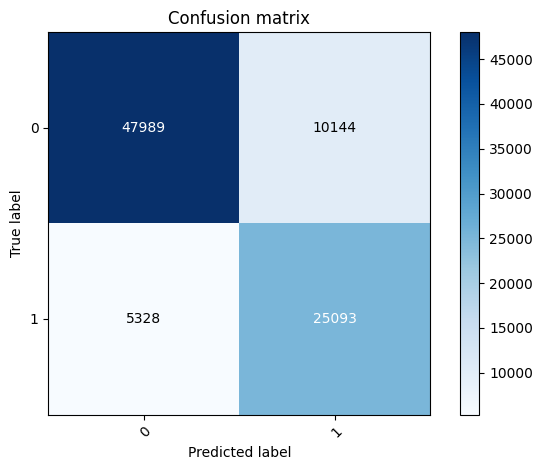

In [14]:
print(classification_report(test['TARGET'], y_pred_r_xgb) )
plot_confusion_matrix(test['TARGET'], y_pred_r_xgb, normalize=False, classes=best_random_xgb.classes_, title='Confusion matrix')

              precision    recall  f1-score   support

           0       0.90      0.83      0.86     58133
           1       0.71      0.82      0.76     30421

    accuracy                           0.83     88554
   macro avg       0.81      0.83      0.81     88554
weighted avg       0.84      0.83      0.83     88554

Normalized confusion matrix
[[0.82550359 0.17449641]
 [0.17514217 0.82485783]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

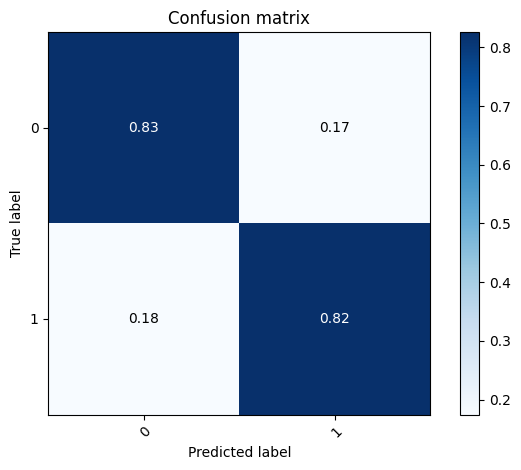

In [15]:
print(classification_report(test['TARGET'], y_pred_r_xgb) )
plot_confusion_matrix(test['TARGET'], y_pred_r_xgb, normalize=True, classes=best_random_xgb.classes_, title='Confusion matrix')

Normalized confusion matrix
[[0.82550359 0.17449641]
 [0.17514217 0.82485783]]


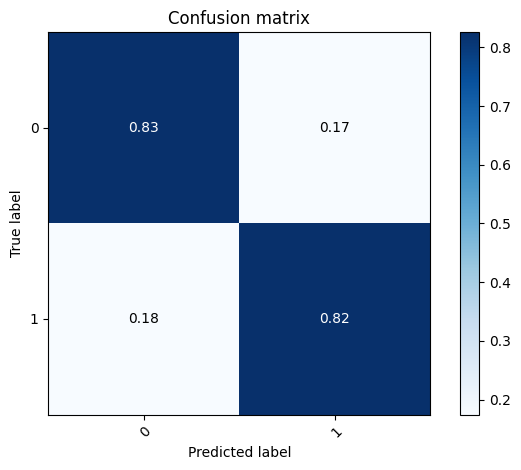

In [16]:
disp = plot_confusion_matrix(test['TARGET'], y_pred_r_xgb, normalize=True, classes=best_random_xgb.classes_, title='Confusion matrix')
plt.savefig( r_graf + 'confusion_matrix_algoritmo_XGBClassifier_random_search.png')

In [17]:
# FEATURE RELEVANCIES
pd.DataFrame({'Attributes': train.drop('TARGET', axis=1).columns.tolist(),
              'Importancia': best_random_xgb.feature_importances_}).sort_values( by='Importancia', ascending=False).reset_index(drop=True)

,Attributes,Importancia
0,BASE_CAL,0.113690
1,M_PRI_P,0.104207
2,N_PRI_P,0.099947
3,M_PUB_P,0.080473
4,LS2,0.074785
5,LS_MS,0.067485
6,SEXO,0.063410
7,SAL_PROM2,0.043608
8,PRES,0.041046
9,M_VOL_EX_P,0.037420


In [18]:
#Gua9rdando el modelo
joblib.dump( best_random_xgb, r_ruta + 'XGBClassifier_random_search.joblib')

['E:/Cristian Guatemal/Master/Big Data y Ciencia de Datos/VIU_TFM/RData/TFM/XGBClassifier_random_search.joblib']

In [16]:
 np.arange(9, 13, 1)

array([ 9, 10, 11, 12])

In [17]:
param_dis_g_xgb = { 'n_estimators': np.arange(430, 470, 10),  
                    'learning_rate': [0.05, 0.1, 0.15 ],  
                    'max_depth': np.arange(9, 13, 1),  
                    'min_child_weight': [1],  
                    'subsample': [0.6, 0.8, 1.0],  
                    'colsample_bytree': [ 1.0],  
                    'gamma': [0.05, 0.1, 0.15],  
                    }

In [18]:
inicio = time.time()
grid_xgb = GridSearchCV( estimator = model_xgb, param_grid = param_dis_g_xgb, 
                         cv=5,  scoring = 'accuracy', n_jobs = -1 )
grid_xgb.fit( X = train.drop(['TARGET'], axis=1), y = train['TARGET'] )
fin = time.time()  
tm= fin-inicio
print('Tiempo de ejecución es:',tm//3600,'horas con',tm%3600//60,'minutos y', tm%60,'segundos' )

C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [11:22:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Tiempo de ejecución es: 3.0 horas con 46.0 minutos y 36.66551089286804 segundos


In [19]:
grid_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.15, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=460,
              n_jobs=None, num_parallel_tree=None, random_state=8, ...)

In [20]:
print(grid_xgb.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.15, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=460,
              n_jobs=None, num_parallel_tree=None, random_state=8, ...)


In [21]:
best_grid_xgb = grid_xgb.best_estimator_
best_grid_xgb.fit( X = train.drop(['TARGET'], axis=1), y = train['TARGET'])
y_pred_g_xgb = best_grid_xgb.predict(X = test.drop(['TARGET'], axis = 1,))
y_pred_g_xgb_train = best_grid_xgb.predict(X = train.drop(['TARGET'], axis = 1,))
acc = accuracy_score(test['TARGET'], y_pred_g_xgb )
acc_train = accuracy_score(train['TARGET'], y_pred_g_xgb_train )
print ('Acc del train', acc_train)
print ('Acc del test', acc)

C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:158: UserWarning: [12:26:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Acc del train 0.9497284143008785
Acc del test 0.8275967206450302


              precision    recall  f1-score   support

           0       0.90      0.83      0.86     58133
           1       0.72      0.82      0.76     30421

    accuracy                           0.83     88554
   macro avg       0.81      0.82      0.81     88554
weighted avg       0.84      0.83      0.83     88554

Confusion matrix, without normalization
[[48460  9673]
 [ 5594 24827]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

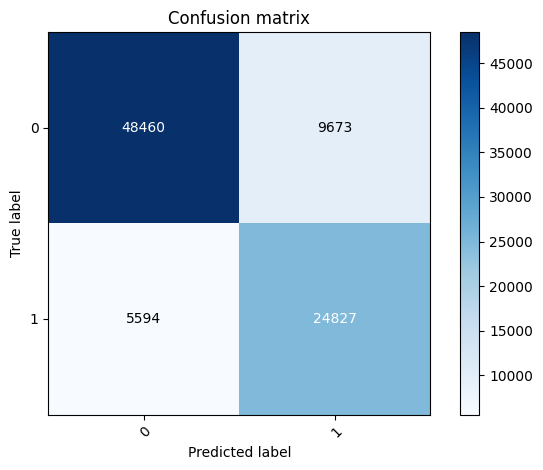

In [22]:
print(classification_report(test['TARGET'], y_pred_g_xgb) )
plot_confusion_matrix(test['TARGET'], y_pred_g_xgb, normalize=False, classes=best_grid_xgb.classes_, title='Confusion matrix')

              precision    recall  f1-score   support

           0       0.90      0.83      0.86     58133
           1       0.72      0.82      0.76     30421

    accuracy                           0.83     88554
   macro avg       0.81      0.82      0.81     88554
weighted avg       0.84      0.83      0.83     88554

Normalized confusion matrix
[[0.8336057  0.1663943 ]
 [0.18388613 0.81611387]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

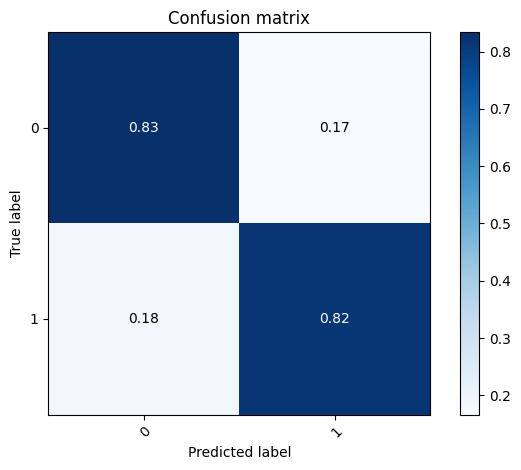

In [23]:
print(classification_report(test['TARGET'], y_pred_g_xgb) )
plot_confusion_matrix(test['TARGET'], y_pred_g_xgb, normalize=True, classes=best_grid_xgb.classes_, title='Confusion matrix')

Normalized confusion matrix
[[0.8336057  0.1663943 ]
 [0.18388613 0.81611387]]


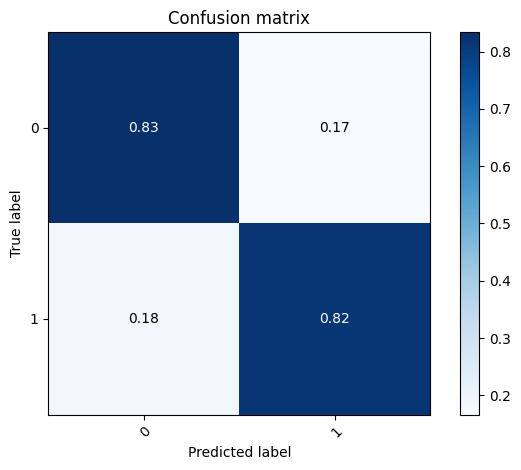

In [24]:
disp = plot_confusion_matrix(test['TARGET'], y_pred_g_xgb, normalize=True, classes=best_grid_xgb.classes_, title='Confusion matrix')
plt.savefig( r_graf + 'confusion_matrix_algoritmo_XGBClassifier_grid_search.png')

In [25]:
# FEATURE RELEVANCIES
pd.DataFrame({'Attributes': train.drop('TARGET', axis=1).columns.tolist(),
              'Importancia': best_grid_xgb.feature_importances_}).sort_values( by='Importancia', ascending=False).reset_index(drop=True)

,Attributes,Importancia
0,BASE_CAL,0.109839
1,M_PRI_P,0.100338
2,N_PRI_P,0.094388
3,M_PUB_P,0.081967
4,LS2,0.071333
5,LS_MS,0.065897
6,SEXO,0.060073
7,SAL_PROM2,0.043025
8,PRES,0.040688
9,M_VOL_EX_P,0.040484


In [26]:
#Gua9rdando el modelo
joblib.dump( best_grid_xgb, r_ruta + 'XGBClassifier_grid_search.joblib')

['E:/Cristian Guatemal/Master/Big Data y Ciencia de Datos/VIU_TFM/RData/TFM/XGBClassifier_grid_search.joblib']

## Redes Neuronales

In [8]:
train.shape

(354216, 20)

In [7]:
#Normaliza
val_no_acp = ['SEXO','PRES',
             'N_PRI_P','N_PUB_P', 'N_IND_P', 'N_VOL_EC_P', 'N_VOL_EX_P', 
             'M_PRI_P','M_PUB_P', 'M_IND_P', 'M_VOL_EC_P', 'M_VOL_EX_P',
             'TARGET']
col_na = train.drop( val_no_acp, axis=1).columns.tolist()

escal_nor = StandardScaler()

Xs = escal_nor.fit_transform( train.drop( val_no_acp, axis=1)) #Se normaliza el train
Xs = pd.concat([ pd.DataFrame(Xs).reset_index().drop(['index'], axis=1), 
                 pd.DataFrame(train[val_no_acp]).reset_index().drop(['index'], axis=1)], axis=1)
Xs.columns = col_na + val_no_acp

test_norm = escal_nor.transform( test.drop( val_no_acp, axis=1))
Ys = pd.concat([ pd.DataFrame(test_norm).reset_index().drop(['index'], axis=1), 
                   pd.DataFrame(test[val_no_acp]).reset_index().drop(['index'], axis=1)], axis=1)
Ys.columns = Xs.columns


In [9]:
red = MLPClassifier(max_iter=100, alpha=0.001, random_state=semilla )  # Ejemplo de ajuste de la tasa de aprendizaje

In [10]:
# Define el espacio de búsqueda de hiperparámetros
param_dist_red = {  'hidden_layer_sizes': [(100,), (150,),(200,),(250,)],
                    'activation': ['relu', 'logistic', 'identify', 'tanh'],
                    'alpha': [0.0001, 0.001, 0.01]
                    }

In [14]:
# Realiza la búsqueda de cuadrícula
inicio = time.time()
grid_red = GridSearchCV( estimator = red, param_grid = param_dist_red, 
                         cv=5,  scoring = 'accuracy', n_jobs = -1)
grid_red.fit(X = Xs.drop('TARGET', axis=1), y = Xs['TARGET'] )
fin = time.time()  
tm= fin-inicio
print('Tiempo de ejecución es:',tm//3600,'horas con',tm%3600//60,'minutos y', tm%60,'segundos' )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\Anaconda3\lib\site-packages

Tiempo de ejecución es: 1.0 horas con 11.0 minutos y 55.163437366485596 segundos


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [15]:
grid_red.best_estimator_

MLPClassifier(hidden_layer_sizes=(200,), max_iter=100, random_state=8)

In [6]:
model_red = joblib.load( r_ruta + 'MLPClassifier.joblib')

In [7]:
print(model_red)

MLPClassifier(hidden_layer_sizes=(200,), max_iter=100, random_state=8)


In [10]:
#model_red = grid_red.best_estimator_
#model_red.fit( X = Xs.drop(['TARGET'], axis=1), y = Xs['TARGET'] )
y_pred_red = model_red.predict(X = Ys.drop(['TARGET'], axis=1))
y_pred_red_train = model_red.predict(X = Xs.drop(['TARGET'], axis=1))
acc = accuracy_score(Ys['TARGET'], y_pred_red )
acc_train = accuracy_score(Xs['TARGET'], y_pred_red_train )
print ('Acc del train', acc_train)
print ('Acc del test', acc)

Acc del train 0.8101412697337218
Acc del test 0.8048083655170856


              precision    recall  f1-score   support

           0       0.83      0.89      0.86     58133
           1       0.75      0.65      0.70     30421

    accuracy                           0.80     88554
   macro avg       0.79      0.77      0.78     88554
weighted avg       0.80      0.80      0.80     88554

Confusion matrix, without normalization
[[51482  6651]
 [10634 19787]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

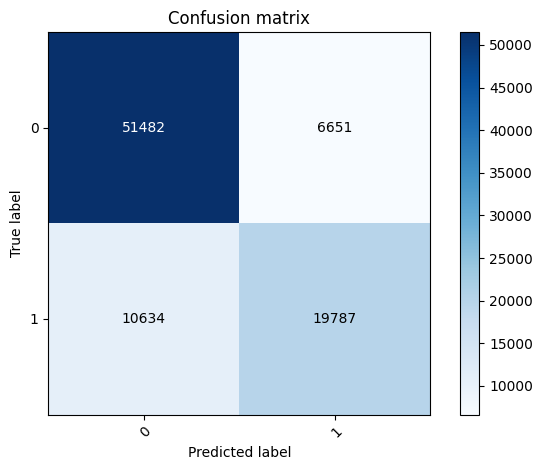

In [13]:
print(classification_report(Ys['TARGET'], y_pred_red) )
plot_confusion_matrix(test['TARGET'], y_pred_red, normalize=False, classes=model_red.classes_, title='Confusion matrix')

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     58133
           1       0.75      0.65      0.70     30421

    accuracy                           0.80     88554
   macro avg       0.79      0.77      0.78     88554
weighted avg       0.80      0.80      0.80     88554

Normalized confusion matrix
[[0.88558994 0.11441006]
 [0.34956116 0.65043884]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

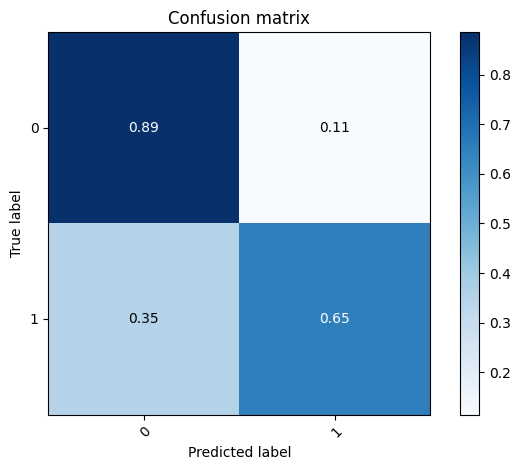

In [14]:
print(classification_report(Ys['TARGET'], y_pred_red) )
plot_confusion_matrix(test['TARGET'], y_pred_red, normalize=True, classes=model_red.classes_, title='Confusion matrix')

Normalized confusion matrix
[[0.88558994 0.11441006]
 [0.34956116 0.65043884]]


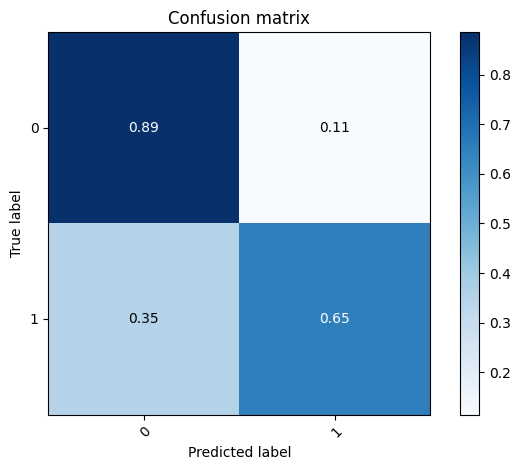

In [18]:
disp = plot_confusion_matrix(test['TARGET'], y_pred_red, normalize=True, classes=model_red.classes_, title='Confusion matrix')
plt.savefig( r_graf + 'confusion_matrix_algoritmo_redes_grid_search.png')

In [103]:
# FEATURE RELEVANCIES
pd.DataFrame({'Attributes': Xs.drop('TARGET', axis=1).columns.tolist(),
              'Importancia': model_red.feature_importances_}).sort_values( by='Importancia', ascending=False).reset_index(drop=True)

AttributeError: 'MLPClassifier' object has no attribute 'feature_importances_'

In [18]:
#Guardando el modelo
joblib.dump( model_red, r_ruta + 'MLPClassifier.joblib')

['E:/Cristian Guatemal/Master/Big Data y Ciencia de Datos/VIU_TFM/RData/TFM/MLPClassifier.joblib']

In [8]:
#Con balanceo de clases
inicio = time.time()
smote_enn = SMOTEENN( random_state = semilla )
X_train_bal, y_train_bal = smote_enn.fit_resample( Xs.drop(['TARGET'], axis=1), Xs['TARGET'] )
fin = time.time()  
tm= fin-inicio
print('Tiempo de ejecución es:',tm//3600,'horas con',tm%3600//60,'minutos y', tm%60,'segundos' )

C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Tiempo de ejecución es: 0.0 horas con 3.0 minutos y 43.31066679954529 segundos


In [9]:
Xs_bal = pd.concat([ X_train_bal, y_train_bal ], axis=1)

In [13]:
# Realiza la búsqueda de cuadrícula
inicio = time.time()
grid_red_bal = GridSearchCV( estimator = red, param_grid = param_dist_red, 
                         cv=5,  scoring = 'accuracy', n_jobs = -1)
grid_red_bal.fit(X = Xs_bal.drop('TARGET', axis=1), y = Xs_bal['TARGET'] )
fin = time.time()  
tm= fin-inicio
print('Tiempo de ejecución es:',tm//3600,'horas con',tm%3600//60,'minutos y', tm%60,'segundos' )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\Anaconda3\lib\site-packages

Tiempo de ejecución es: 2.0 horas con 1.0 minutos y 34.72314953804016 segundos


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
grid_red_bal.best_estimator_

MLPClassifier(hidden_layer_sizes=(250,), max_iter=100, random_state=8)

In [10]:
model_red_bal = joblib.load( r_ruta + 'MLPClassifier_bal.joblib')

In [11]:
print(model_red_bal)

MLPClassifier(hidden_layer_sizes=(250,), max_iter=100, random_state=8)


In [12]:
#model_red_bal = grid_red_bal.best_estimator_
#model_red_bal.fit( X = Xs_bal.drop(['TARGET'], axis=1), y = Xs_bal['TARGET'] )
y_pred_red_bal = model_red_bal.predict(X = Ys.drop(['TARGET'], axis=1))
y_pred_red_bal_train = model_red_bal.predict(X = Xs.drop(['TARGET'], axis=1))
acc = accuracy_score(Ys['TARGET'], y_pred_red_bal )
acc_train = accuracy_score(Xs['TARGET'], y_pred_red_bal_train )
print ('Acc del train', acc_train)
print ('Acc del test', acc)

Acc del train 0.7625855410258148
Acc del test 0.7582604964202634


              precision    recall  f1-score   support

           0       0.90      0.71      0.79     58133
           1       0.61      0.85      0.71     30421

    accuracy                           0.76     88554
   macro avg       0.75      0.78      0.75     88554
weighted avg       0.80      0.76      0.76     88554

Confusion matrix, without normalization
[[41361 16772]
 [ 4635 25786]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

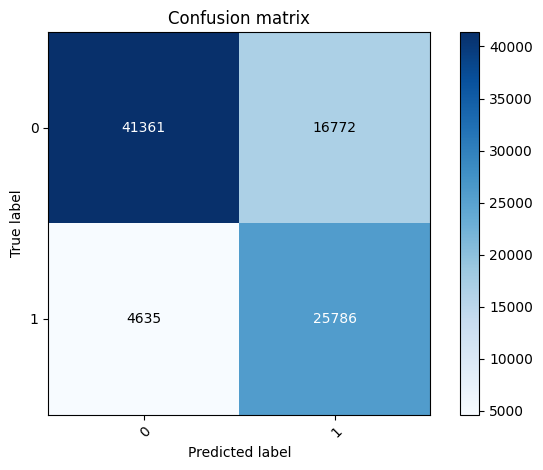

In [13]:
print(classification_report(Ys['TARGET'], y_pred_red_bal) )
plot_confusion_matrix(Ys['TARGET'], y_pred_red_bal, normalize=False, classes=model_red_bal.classes_, title='Confusion matrix')

              precision    recall  f1-score   support

           0       0.90      0.71      0.79     58133
           1       0.61      0.85      0.71     30421

    accuracy                           0.76     88554
   macro avg       0.75      0.78      0.75     88554
weighted avg       0.80      0.76      0.76     88554

Normalized confusion matrix
[[0.71148917 0.28851083]
 [0.15236186 0.84763814]]


<Axes: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

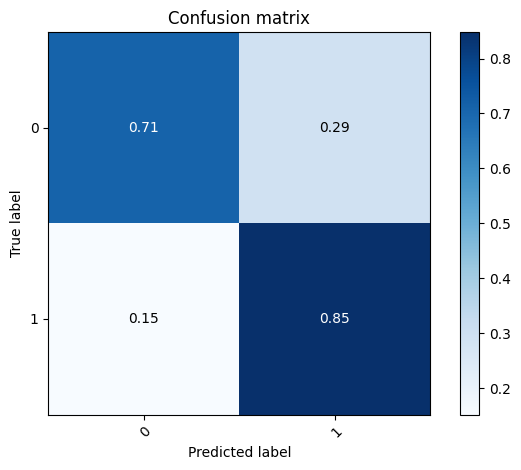

In [14]:
print(classification_report(Ys['TARGET'], y_pred_red_bal) )
plot_confusion_matrix(Ys['TARGET'], y_pred_red_bal, normalize=True, classes=model_red_bal.classes_, title='Confusion matrix')

Normalized confusion matrix
[[0.71148917 0.28851083]
 [0.15236186 0.84763814]]


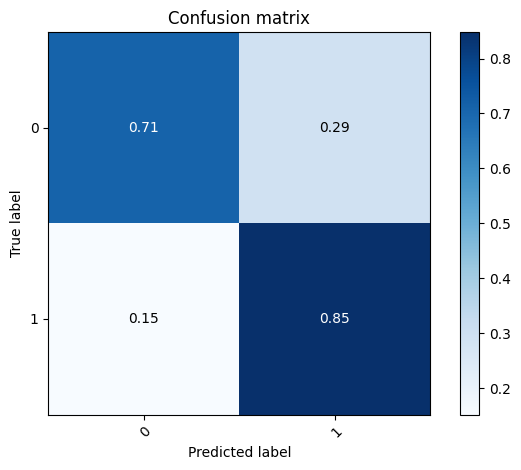

In [15]:
disp = plot_confusion_matrix(Ys['TARGET'], y_pred_red_bal, normalize=True, classes=model_red_bal.classes_, title='Confusion matrix')
plt.savefig( r_graf + 'confusion_matrix_algoritmo_redes_bal_grid_search.png')

In [17]:
#Guardando el modelo
joblib.dump( model_red_bal, r_ruta + 'MLPClassifier_bal.joblib')

['E:/Cristian Guatemal/Master/Big Data y Ciencia de Datos/VIU_TFM/RData/TFM/MLPClassifier_bal.joblib']